Ray 个人翻译，切勿商业使用。
# 分类 

## MNIST数据集
我们将使用MNIST数据集，这个数据集有70000张由US Census Bureaude 的学生和员工手写的数字的小图片。这个数据集常常被用来研究，就像是机器学习的“HELLO WORLD”－样。无论何时，只要人们想出来一个新的分类算法，他们总是好奇在MNIST上的效果。无论何时，只要一个人学习机器学习，迟早会处理MNIST。
Scikit-Learn提供了下载著名数据集的助手函数。MNIST也可以倍用来下载。

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

In [ ]:
Scikit-Learn下载的数据通常都是相似的字典结构：
• 一个'DESCR'键来描述数据集
• 一个'data'键包含一个含有一行代表一个实例，一列代表一个属性的数组
• 一个'target'键包含标签值的数组

In [4]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

数据集有70000个图像，每个图像有784个特征。这是因为每个图像是28×28像素，并且每个特征简单地表示一个像素的强度，从0（白色）到255（黑色）。让我们从数据集中看一个数字。你需要做的就是抓取一个实例的特征向量，将它改写成一个28×28的数组，然后使用Matplotlib’s imshow()来显示它。

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot")
plt.show()

图3-1显示了MNIST数据集的更多图像，让您感受到分类任务的复杂性。
![](./images/3-1.png)
但是等等！你应该总是创建一个测试集并把它放在一边，然后仔细检查数据。MNIST数据集实际上已经被分割成一个训练集（前60000个图像）和一个测试集（最后10000个图像）：
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
我们也可以对训练集进行洗牌，这样可以保证所有交叉验证的折叠都是相似的（你不希望一个数字会丢失一个数字）。此外，一些学习算法对训练实例的顺序是敏感的，并且如果它们执行时连续获得很多类似的例子效果就会就很糟糕。数据集的洗牌确保不会发生这种情况。

### 打乱数据集shuffle

In [5]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 训练二分类
现在让我们简化这个问题，只尝试找出一个数字，例如数字5。这个“5检测器”将是二分类器的一个例子，能够区分两个类，5和不是5。让我们为这个分类任务创建目标向量：

In [ ]:
y_train_5 = (y_train == 5)
 # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

好，现在让我们选一个分类器并训练它。开始的好地方是使用随机梯度下降（SGD）分类器，使用Scikit-Learn的SGDClassifier类。该分类器具有能够有效处理非常大的数据集的优点。这部分是因为SGD每次单独地处理训练实例（这也使得SGD非常适合在线学习），正如我们稍后将看到的。让我们创建一个SGD分类器并在整个训练集上进行训练：

### 训练模型

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
sgd_clf = SGDClassifier(random_state = 42)
ran_for_clf = RandomForestClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5) #二分类
ran_for_clf.fit(X_train, y_train) #多分类

/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

SGD分类器依赖于训练过程中的随机性（因此命名为“随机”）。如果需要可重复的结果，则应设置random_state参数。

# 效果衡量

评估分类器通常比评估回归函数要复杂得多，因此将在本主题中花费大量篇章。有很多可用的性能指标，所以再拿一杯咖啡，准备学习许多新概念和首字母缩略词！

## 交叉验证衡量精度

评估模型的一个好方法是使用交叉验证，就像你在第2章中所做的那样。
### 实现交叉验证
偶尔，您需要更多的交叉验证过程的控制，而不是SCIKIT学习提供的现成的。在这些情况下，您可以自己实现交叉验证；实际上是相当简单的。下面的代码与Scikit-Learn的 cross_val_score()函数大致相同，并打印相同的结果：

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

StratifiedKFold类执行分层抽样（如第2章所述），以产生包含每个类的代表比率的折。在每次迭代中，代码创建分类器的克隆，在训练折叠上训练克隆，并对测试折叠进行预测。然后计算正确预测的数量并输出正确预测的比率。

In [8]:
from sklearn.model_selection import cross_val_predict
y_train_5_pre = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
y_train_pre = cross_val_predict(ran_for_clf, X_train, y_train, cv = 5)

#from sklearn.model_selection import cross_val_score
#cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

In [9]:
y_train_5_pre
#y_train_pre

array([False, False, False, ..., False, False, False])

哇！超过95%的准确度（正确预测的比率）对所有折交叉验证？这看起来很神奇，不是吗？嗯，在你太兴奋之前，让我们来看看一个非常愚蠢的分类器，它只对“非5”类中的每一个图像进行分类：

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

你能猜出这个模型的准确性吗？让我们找出：

In [ ]:
>>> never_5_clf = Never5Classifier()
>>> cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
array([ 0.909 , 0.90715, 0.9128 ])

没错，它有超过90%的准确率！这很简单，因为只有大约10%的图像是5，所以如果你总是猜测图像不是5，那么你大约有90%的时间是正确的。打败Nostradamus。

这说明了为什么精度通常不是分类器的首选性能度量，特别是当您处理倾斜数据集时（即，当某些类比其他数据集更频繁时）。

## 混淆矩阵
评估分类器性能的一个更好的方法是查看混淆矩阵。一般的想法是计数类A的实例被分类为B类的次数。例如，为了知道分类器混淆5与3的图像的次数，你会看到混淆矩阵的第五行和第三列。

要计算混淆矩阵，首先需要有一组预测，这样它们就可以与实际目标进行比较。你可以在测试集上做出预测，但是现在让我们保持它不变（记住一旦你有了一个你准备使用的分类器，你只在项目的末尾使用测试集）。相反，您可以使用cross_val_predict()函数：

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

就像cross_val_score()函数，cross_val_predict执行k折交叉验证，但它不是返回评价分数，而是返回每个测试折叠上的预测。这意味着你对训练集中的每个实例都有一个干净的预测（“干净”），意味着预测是由看不到训练中数据的模型预测的。

现在，可以confusion_matrix()函数获取混淆矩阵。只传递目标类（y_train_5）和预测类（(y_train_pred）：

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_5_pre)

array([[53590,   989],
       [ 1434,  3987]])

混淆矩阵中的每一行表示一个实际类，而每个列表示一个预测类。该矩阵的第一行考虑非5图像（负类）：其中53272个被正确分类为非5（它们被称为真阴性），而其余1307个被错误分类为5（假阳性）。第二行认为5S（阳性类）的图像：1077被错误分类为非5（假阴性），而剩下的4344被正确分类为5（真阳性）。一个完美的分类器只有真正和真负，所以它的混淆矩阵只有在它的主对角线上（左上到右下）才有非零值。

混淆矩阵给了你很多信息，但有时你可能更喜欢一个更简洁的度量。一个有趣的观察是正预测的准确性；这被称为分类器的精度（方程式3-1）。
precision =TP / (TP + FP)
TP是真阳性的数目，FP是假阳性的数目。

具有完美精度的一种简单的方法是进行一个正的预测，并确保它是正确的（精度＝1/1＝100%）。这将是非常有用的，因为分类器会忽略除了一个正实例之外的所有。因此，精度通常与另一个称为召回的度量，也称为灵敏度或真阳性率（TPR）一起使用：这是由分类器正确地检测到的正例的比率（方程3-2）。
recall = TP / (TP + FN)
FN是假阴性的数目。

如果你对混淆矩阵感到困惑，图3-2可能会有所帮助。
![](./images/3-2.png)

## 精度与召回

Scikit-Learn提供了计算分类器度量的几个函数，包括精度和召回：

In [ ]:
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)
0.76871350203503808
>>> recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)
0.80132816823464303

现在你的5检测器看起来不像你看到它的准确性一样闪闪发光。当它声称图像代表5时，只有77%的时间是正确的。此外，它只检测80%的5。

将精度和召回率合并到一个称为F1分数的度量中通常是方便的，特别是如果需要一种简单的方法来比较两个分类器。F1分数是精度和召回的调和平均值（方程式3-3）。而正则均值平均对待所有值，调和平均值给低值赋予更多的权重。因此，如果召回率和精度都很高，分类器只会得到较高的F1分数。
![](./images/e3-3.png)
要计算F1分数，只需调用 f1_score()函数：

f1分数有利于具有相似精度和召回的分类器。这并不总是你想要的：在某些情况下，你最关心的是精确性，而在其他情况下，你真的很在乎召回。例如，如果你训练了一个分类器来检测对孩子来说是安全的视频，那么你可能更喜欢一个拒绝很多好视频（低召回率）的分类器，但只保留安全的（高精度），而不是一个具有更高召回率的分类器，但是让一些非常糟糕的视频显示出来。在您的产品中（在这种情况下，您甚至可能需要添加一个人力管道来检查分类器的视频选择）。另一方面，假设你训练一个分类器来监视监视图像上的小偷。如果你的分类器只有30%的精确度，那么只要它有99%的召回率（当然，安全卫士会得到一些错误警报，但是几乎所有的扒手都会被捕获），那么它可能是好的。

不幸的是，你不能两面兼顾：提高精确度会降低召回率，反之亦然。这就是所谓的精确/召回权衡。

In [11]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_5_pre)
recall_score(y_train_5, y_train_5_pre)

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_5_pre)

0.7669520053861691

## Precision/Recall 的权衡 使用Threshold
为了理解这种折中，让我们来看看SGDClassifier是如何做出分类决策的。对于每个实例，它基于一个决策函数计算一个分数，如果该分数大于一个阈值，它将实例分配给正类，或者将它分配给负类。图3-3显示了一些数字，从左边的最低分数到右边的最高分数。假设决策阈值位于中心箭头（在两个5之间）：你会发现4个真阳性（实际5）在该阈值的右边，一个假阳性（实际上是6）。因此，利用该阈值，精度为80%（5个中的4个）。但是在6个实际的5s中，分类器仅检测4个，因此召回率为67%（6个中的4个）。现在，如果你提高阈值（把它移到右边的箭头上），假阳性（6）变成真的阴性，从而提高精确度（在这种情况下高达100%），但是一个真正的阳性变成假阴性，将召回降低到50%。相反，降低阈值会增加召回率并降低精度。
![](./images/3-3.png)

Scikit-Learn不允许直接设置阈值，但是它确实让你访问它用来做出预测的决策分数。不调用分类器的predict()方法，你可以调用它的 decision_function()方法，它为每个实例返回一个分数，然后使用你想要的任何阈值来基于这些分数进行预测：

In [ ]:
>>> y_scores = sgd_clf.decision_function([some_digit])
>>> y_scores
array([ 161855.74572176])
>>> threshold = 0
>>> y_some_digit_pred = (y_scores > threshold)
array([ True], dtype=bool)

SGDClassifier使用等于0的阈值，因此先前的代码返回与predict()方法相同的结果（即TRUE）。让我们提高阀值：

In [ ]:
>>> threshold = 200000
>>> y_some_digit_pred = (y_scores > threshold)
>>> y_some_digit_pred
array([False], dtype=bool)

这证实了提高阀值降低召回率。图像实际上代表了5，分类器在阈值为0时检测到它，但是当阈值增加到200000时它就错了。

那么你如何决定使用哪一个阈值呢？为此，您将首先需要使用 cross_val_predict()函数再次获得训练集中的所有实例的分数，但这次指定您希望它返回决策分数而不是预测：

现在使用这些分数，您可以使用 precision_recall_curve()函数计算所有可能的阈值的精度和召回率：

In [12]:
y_5_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_5_scores.shape#有些版本sklearn  method="decision_function"会返回2列，第一列为全0，所以需要y_scores = y_scores[:, 1]
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_5_scores)

/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarni

In [ ]:
最后，您可以使用Matplotlib绘制阈值和函数的精确性（图3-4）：

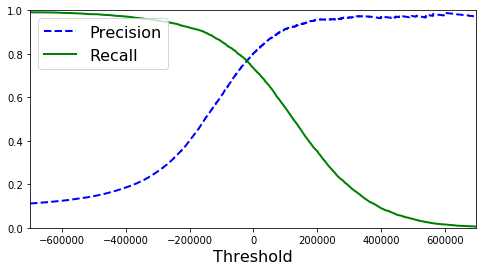

In [13]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

你可能会想，为什么精确曲线比图3-4中的记忆曲线还要崎岖。原因是当你提高阈值时，精度有时会下降（尽管一般情况下它会上升）。要理解为什么，回头看图3-3，注意当你从中心阈值开始时，发生什么事情，然后向右移动一个数字：精度从4/5（80%）下降到3/4（75%）。另一方面，当阈值增加时，召回只能下降，这就解释了为什么曲线看起来平滑。

现在，您可以简单地选择阈值，为您提供最佳的精度/召回权衡为您的任务。选择一个良好的精度/召回权衡的另一种方法是将精度直接映射到召回，如图3-5所示。
![](./images/3-5.png)
你可以看到，80%的召回率确实开始大幅下降。您可能希望在该下降之前选择一个精确/召回权衡，例如，大约60%的召回。当然，选择取决于你的项目。

假设你决定瞄准90%的精度。你查找第一个情节（放大一点），发现你需要使用一个大约70000的阈值。为了进行预测（在现在的训练集上），而不是调用分类器的predict()
方法，可以只运行这个代码：

In [ ]:
y_train_pred_90 = (y_scores > 70000)
#Let’s check these predictions’ precision and recall:
>>> precision_score(y_train_5, y_train_pred_90)
0.86592051164915484
>>> recall_score(y_train_5, y_train_pred_90)
0.69931746910164172

很好，你有一个90%精度分级机（或足够接近）！正如你所看到的，创建一个几乎任何你想要的精度的分类器是相当容易的：只要设置一个足够高的阈值，你就完成了。嗯，没那么快。如果它的召回率太低，那么高精度分类器就不是很有用了！

## roc曲线
 receiver operating characteristic（ROC）曲线是与二分类器一起使用的另一种常用工具。它与精度/召回曲线非常相似，但不是绘制精度与召回率，ROC曲线绘制了 true positive rate真阳率（召回的另一个名称）除以 false positive rate假阳率。FPR是不正确分类为正的负实例的比率。它等于1减去真阴率，这是被正确分类为负的负实例的比率。TNR也被称为 specificity特异性。因此，ROC曲线图灵敏度（召回）与1- specificity特异性。

为了绘制ROC曲线，首先需要使用ROCKURVER（）函数计算各种阈值的TPR和FPR：

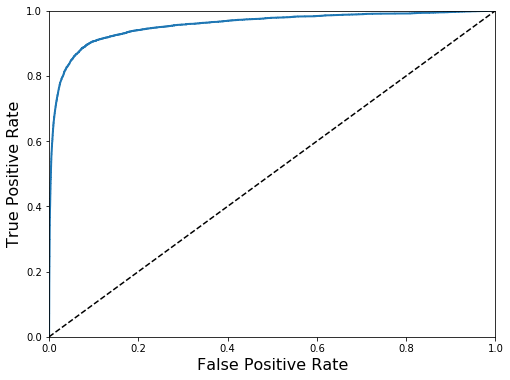

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_5_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

##### roc的auc

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_5_scores)

0.956443519695573

In [16]:
from sklearn.ensemble import RandomForestClassifier
ran_for_5_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(ran_for_5_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

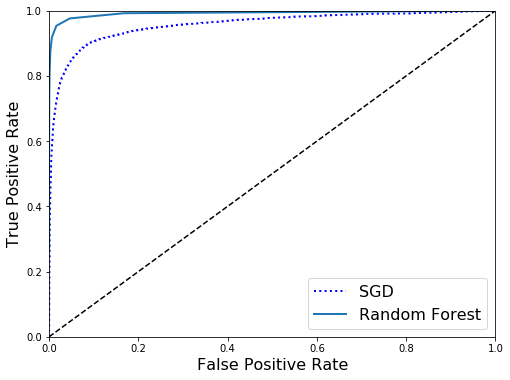

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

再次有一个折衷：召回率（TPR）越高，分类器产生的假阳性（FPR）越多。虚线表示纯随机分类器的ROC曲线；一个好的分类器尽可能远离该行（向左上角）。

比较分类器的一种方法是测量曲线下面积（AUC）。一个完美的分类器将具有等于1的ROC AUC，而纯随机分类器将具有等于0.5的ROC AUC。 Scikit-Learn提供了一个计算ROC AUC的函数：
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)
0.96244965559671547

由于ROC曲线与精度/召回（或PR）曲线非常相似，您可能想知道如何决定使用哪一个。作为一个经验法则，你应该喜欢PR曲线当正类是罕见的，或当你更多地关心假阳性比假阴性，否则用ROC曲线。例如，查看前面的ROC曲线（和ROC AUC分数），您可能会认为分类器确实很好。但这主要是因为与阴性（非5）相比，很少有阳性（5）。相反，PR曲线清楚地表明分类器有改进的空间（曲线可以更接近右上角）。

让我们训练一个随机森林分类器RandomForestClassifier，并将其ROC曲线和ROC AUC分数与SGDClassifier进行比较。首先，你需要为训练集中的每个实例获得分数。但由于它的运作方式（见第7章），RandomForestClassifier类没有一个decision_function()方法。相反，它有一个predict_proba()方法。 Scikit-Learn分类器通常有一个或另一个。predict_proba()方法返回一个包含每个实例行和每个类的列的数组，每个包含给定实例属于给定类的概率（例如，70%可能性的图像表示5）：

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")


但要绘制ROC曲线，你需要的是分数，而不是概率。一个简单的解决方案是使用正类的概率作为分数：
y_scores_forest = y_probas_forest[:, 1]　#score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

现在你已经准备好绘制ROC曲线了。绘制第一个ROC曲线也是很有用的，看看它们是如何比较的（图3-7）：

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
正如在图3-7中所看到的，随机森林分类器的ROC曲线看起来比SGD分类器更好：它更靠近左上角。因此，其ROC AUC评分也明显好：
roc_auc_score(y_train_5, y_scores_forest)
0.99312433660038291
尝试测量精度和回忆分数：你应该找到98.5%的精确度和82.8%的召回。还不错！

希望你现在知道如何训练二元分类器，为你的任务选择合适的度量，使用交叉验证来评估你的分类器，选择符合你的需求的精度/召回权衡，并使用ROC曲线和ROC AUC分数比较各种模型。现在让我们尝试检测不仅仅是5。

##### 交叉验证，precision recall

In [18]:
y_train_pred_forest = cross_val_predict(ran_for_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9839679358717435

## 多分类
### 数据预处理
### 划分测试训练数据
### 训练模型

In [19]:
#ran_for_clf = RandomForestClassifier(random_state = 42)
#ran_for_clf.fit(X_train, y_train) #多分类
y_train_pre_ran = cross_val_predict(ran_for_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pre_ran)
conf_mx

array([[5810,    2,   17,    9,    9,   16,   20,    4,   31,    5],
       [   1, 6634,   30,   22,   18,    6,    6,   11,   10,    4],
       [  41,   30, 5627,   58,   40,   19,   30,   50,   57,    6],
       [  30,   22,  130, 5654,    3,  104,   16,   58,   81,   33],
       [  23,   18,   31,    9, 5528,   11,   29,   13,   26,  154],
       [  54,   14,   24,  189,   39, 4956,   55,   11,   53,   26],
       [  52,   22,   26,    4,   26,   67, 5692,    0,   27,    2],
       [  10,   33,   79,   27,   67,    9,    2, 5929,   21,   88],
       [  33,   55,  103,  124,   64,  110,   44,   14, 5227,   77],
       [  36,   20,   30,   87,  170,   49,    7,   89,   64, 5397]])

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums.astype(np.float64)
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## 多标签分类（Multilabel Classification）

In [22]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 6)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict(X_test)

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

## 多输出分类（Multioutput Classification）

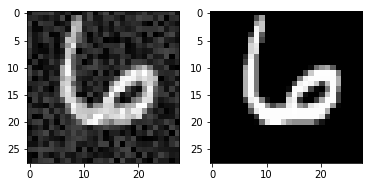

In [26]:
#去噪声
import numpy.random  as rnd
noise_train = rnd.randint(0, 100, (len(X_train), 784))
noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_train_noise = X_train + noise_train
X_test_nosise = X_test + noise_test
y_train_noise = X_train
y_test_noise = X_test
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(X_train_noise[20000].reshape(28, 28), cmap = plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(y_train_noise[20000].reshape(28, 28), cmap = plt.cm.gray)


### 训练多输出分类 -- 去噪声

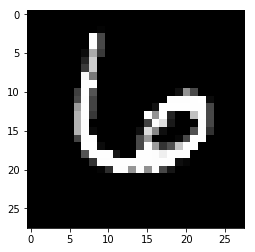

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_noise, y_train_noise)
pre_digit = knn_clf.predict([X_train_noise[20000]])
plt.imshow(pre_digit.reshape(28, 28), cmap = plt.cm.gray)

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(ran_for_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.94276145, 0.94144707, 0.93849077])

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [1, 10, 100, 200, 500, 1000], 'max_features': ["auto", "sqrt"]}
]
grid_search = GridSearchCV(ran_for_clf, param_grid, cv = 3, scoring = "accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1, 10, 100, 200, 500, 1000], 'max_features': ['auto', 'sqrt']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)